- 작성자: 김명환 (Kim Myunghwan)
- 작성일: 2025년 7월 9일
- 목적: matplotlib.pyplot에서 한글 폰트가 깨지지 않도록 설정한 템플릿
- github: https://github.com/c0z0c/jupyter_hangul
- 환경: Jupyter Notebook 및 Google Colab 겸용
- 자유롭게 편집해서 사용하세요

**한글 폰트 설정 셀**

In [1]:
# 기본 라이브러리

# --- Scikit-learn: 데이터 전처리, 모델, 평가 ---
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import (
    fetch_california_housing, load_iris, make_moons, make_circles,
    load_breast_cancer, load_wine
)
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import average_precision_score

# --- 기타 라이브러리 ---
import cv2
from PIL import Image
from PIL import ImageFilter
from PIL import ImageDraw
import albumentations as A
import IPython.display
#from tqdm import tqdm
from tqdm.notebook import tqdm

# --- PyTorch: 딥러닝 관련 ---
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import Subset
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import v2
from torchvision.datasets import CocoDetection
from torchvision.transforms import functional as TF
from torch.nn import CrossEntropyLoss
from torch.utils.data import Dataset
from collections import OrderedDict
from pycocotools.coco import COCO
from pycocotools import mask as coco_mask

# --- 기타 ---
import re
import os
import sys
import copy
import json
import math
import random
import yaml
import shutil
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from datetime import datetime
from datetime import timezone, timedelta
import pytz
__kst = pytz.timezone('Asia/Seoul')

# GPU 설정
__device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
__device_cpu = torch.device('cpu')

  # 재현 가능한 결과를 위해
np.random.seed(42)
torch.manual_seed(42)
if __device == 'cuda':
    torch.cuda.manual_seed_all(42)

print(f"라이브러리 로드 완료 사용장치:{__device}")

라이브러리 로드 완료 사용장치:cpu


In [2]:
from urllib.request import urlretrieve; urlretrieve("https://raw.githubusercontent.com/c0z0c/jupyter_hangul/refs/heads/beta/helper_c0z0c_dev.py", "helper_c0z0c_dev.py")
import importlib
import helper_c0z0c_dev as helper
importlib.reload(helper)

🌐 https://c0z0c.github.io/jupyter_hangul
ℹ️ NumPy 2.1.3 (v2.x+): 호환성 모드 적용됨
✅ 설정 완료: 한글 폰트, plt 전역 등록, pandas 확장, 캐시 기능
pd commit 저장 경로 = d:\GoogleDrive\codeit_ai_health_eat\scripts\김명환
🌐 https://c0z0c.github.io/jupyter_hangul
ℹ️ NumPy 2.1.3 (v2.x+): 호환성 모드 적용됨
✅ 설정 완료: 한글 폰트, plt 전역 등록, pandas 확장, 캐시 기능
pd commit 저장 경로 = d:\GoogleDrive\codeit_ai_health_eat\scripts\김명환


<module 'helper_c0z0c_dev' from 'd:\\GoogleDrive\\codeit_ai_health_eat\\scripts\\김명환\\helper_c0z0c_dev.py'>

In [3]:
import os, sys
from pathlib import Path

utils_dir = None
if helper.is_colab:
    utils_dir = "/content/drive/MyDrive/codeit_ai_health_eat/src/python_modules/utils"
else:
    utils_dir = os.path.join(Path.cwd().drive + '\\', 'GoogleDrive', "codeit_ai_health_eat", "src", "python_modules", "utils")

print("utils_dir:", utils_dir)

sys.path.append(str(utils_dir))
print("sys.path:", sys.path)
import importlib
import health_ea_utils as heu
importlib.reload(heu)
from health_ea_utils import *

print("helper.__file__:", helper.__file__)
print("health_ea_utils.__file__:", heu.__file__)


utils_dir: d:\GoogleDrive\codeit_ai_health_eat\src\python_modules\utils
sys.path: ['c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827\\python310.zip', 'c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827\\DLLs', 'c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827\\lib', 'c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827', '', 'C:\\Users\\sw1\\AppData\\Roaming\\Python\\Python310\\site-packages', 'c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827\\lib\\site-packages', 'c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827\\lib\\site-packages\\win32', 'c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827\\lib\\site-packages\\win32\\lib', 'c:\\Users\\sw1\\anaconda3\\envs\\env_colab_250827\\lib\\site-packages\\Pythonwin', 'd:\\GoogleDrive\\codeit_ai_health_eat\\src\\python_modules\\utils']
🌐 https://c0z0c.github.io/jupyter_hangul
ℹ️ NumPy 2.1.3 (v2.x+): 호환성 모드 적용됨
✅ 설정 완료: 한글 폰트, plt 전역 등록, pandas 확장, 캐시 기능
pd commit 저장 경로 = d:\GoogleDrive\codeit_ai_health_eat\scripts\김명환
🌐 https://c0z0c.github.io/ju

In [4]:
# google drive root에 keggle.json 파일 필요합니다.

#kaggle_code_it_data = "~/.cache/kaggle_code_it_data" if helper.is_colab else os.path.join(Path.cwd(),'dataset', 'kaggle_code_it_data')
kaggle_config_dir = "/content/drive/MyDrive/" if helper.is_colab else os.path.join(Path.cwd().drive + '\\', 'GoogleDrive')
print("kaggle_config_dir:", kaggle_config_dir)
kaggle_code_it_data = os.path.join( '~/.cache/' if helper.is_colab else Path.cwd().drive + '\\','dataset', 'kaggle_code_it_data')
print("kaggle_code_it_data:", kaggle_code_it_data)

import sys
from kaggle.api.kaggle_api_extended import KaggleApi
from tqdm import tqdm

def download_ai01_level1_project():
    os.environ['KAGGLE_CONFIG_DIR'] = kaggle_config_dir
    kaggle_path = os.path.join(kaggle_code_it_data, 'ai04-level1-project.zip')
    if not os.path.exists(kaggle_path):
        os.makedirs(kaggle_code_it_data, exist_ok=True)
        print("Kaggle 데이터 다운로드 중...")
        api = KaggleApi()
        api.authenticate()
        # 전체 압축파일 다운로드 (프로그래스 바는 kaggle API에서 지원하지 않음)
        api.competition_download_files('ai04-level1-project', path=kaggle_code_it_data)
        return os.path.join(kaggle_code_it_data, 'ai04-level1-project.zip')
        print("Kaggle 데이터 다운로드 완료")
    else:
        return kaggle_path
        print("Kaggle 데이터 다운로드 완료")
        
kaggle_path = os.path.join(kaggle_code_it_data, 'ai04-level1-project.zip')
kaggle_unzip_path = os.path.join(kaggle_code_it_data, 'ai04-level1-project.zip.unzip')
if os.path.exists(kaggle_unzip_path) is False:
    kaggle_path = download_ai01_level1_project()
    heu.unzip([kaggle_path,])
    kaggle_unzip_path = f"{kaggle_path}.unzip"
    print(f"다운로드 완료", kaggle_unzip_path)
else:
    kaggle_unzip_path = f"{kaggle_path}.unzip"
    print(f"이미 다운로드 받았습니다.", kaggle_unzip_path)

root_dir = os.path.join(kaggle_unzip_path)


kaggle_config_dir: d:\GoogleDrive
kaggle_code_it_data: d:\dataset\kaggle_code_it_data
이미 다운로드 받았습니다. d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip


In [5]:
heu.print_dir_tree(root=kaggle_unzip_path)

|-- test_images
   [데이터파일: 843개]
   |-- 1.png
   |-- 10.png
   |-- 100.png
   |-- 1003.png
   |-- 1004.png
   |-- 1005.png
   |-- 1006.png
   |-- 1007.png
   |-- 1009.png
   |-- 1010.png
   |-- 1012.png
   |-- 1013.png
   |-- 1014.png
   |-- 1015.png
   |-- 1016.png
   |-- 1018.png
   |-- 1019.png
   |-- 102.png
   |-- 1020.png
   |-- 1022.png
   |-- 1023.png
   |-- 1025.png
   |-- 1026.png
   |-- 1027.png
   |-- 1028.png
   |-- 1029.png
   |-- 1030.png
   |-- 1034.png
   |-- 1039.png
   |-- 104.png
   |-- 1041.png
   |-- 1043.png
   |-- 1044.png
   |-- 1045.png
   |-- 1046.png
   |-- 1047.png
   |-- 1050.png
   |-- 1051.png
   |-- 1053.png
   |-- 1055.png
   |-- 1056.png
   |-- 1057.png
   |-- 1058.png
   |-- 1060.png
   |-- 1064.png
   |-- 1065.png
   |-- 1067.png
   |-- 1069.png
   |-- 1070.png
   |-- 1073.png
   |-- 1075.png
   |-- 1076.png
   |-- 1077.png
   |-- 1079.png
   |-- 108.png
   |-- 1080.png
   |-- 1081.png
   |-- 1085.png
   |-- 1087.png
   |-- 1089.png
   |-- 109.png
 

In [6]:
import pandas as pd
import json

In [7]:
def df_filename_list(root):
    """
    root 하위의 모든 .json 파일에 대해
    - 파일명(확장자 없는)
    - json 파일 경로
    - png 파일 경로 (동일 경로, 동일 파일명, 확장자만 .png)
    를 DataFrame으로 반환
    """
    import os
    import pandas as pd

    records = []
    for dirpath, _, filenames in os.walk(root):
        for fname in filenames:
            filename = os.path.splitext(fname)[0]
            records.append({
                'filename': filename,
                'path': os.path.join(dirpath, fname)
            })
    return pd.DataFrame(records)


In [8]:
df_test = df_filename_list(os.path.join(kaggle_unzip_path, 'test_images'))
df_train = df_filename_list(os.path.join(kaggle_unzip_path, 'train_images'))

In [9]:
df_test.describe().head_att()
df_train.describe().head_att()

        filename                                                                             path
  count      843                                                                              843
 unique      843                                                                              843
    top      999 d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\999.png
   freq        1                                                                                1
                                                filename                                                                                                                           path
  count                                             1489                                                                                                                           1489
 unique                                             1489                                                                                      

In [10]:


def check_json_png_pair(df):
    """
    filename 기준으로 json과 png가 모두 존재하는지 검사
    + 추가: Train, mixing, one 컬럼 생성
    """
    import os
    df.sort_values(by='filename', inplace=True)
    df_json = df[df['path'].str.lower().str.endswith('.json')].copy()
    df_png = df[df['path'].str.lower().str.endswith('.png')].copy()

    df_json['jsonpath'] = df_json['path']
    df_png['pngpath'] = df_png['path']

    merged = pd.merge(df_json[['filename', 'jsonpath']],
                      df_png[['filename', 'pngpath']],
                      on='filename', how='outer')

    merged['json_exists'] = merged['jsonpath'].notnull()
    merged['png_exists'] = merged['pngpath'].notnull()
    merged['pair_exists'] = merged['json_exists'] & merged['png_exists']

    # 파일명 일치 여부 체크
    merged['json_name_match'] = merged.apply(
        lambda row: row['json_exists'] and os.path.splitext(os.path.basename(str(row['jsonpath'])))[0] == row['filename'], axis=1)
    merged['png_name_match'] = merged.apply(
        lambda row: row['png_exists'] and os.path.splitext(os.path.basename(str(row['pngpath'])))[0] == row['filename'], axis=1)

    # Train, mixing, one 컬럼 추가
    def check_train(row):
        path = str(row['jsonpath']) if row['json_exists'] else str(row['pngpath'])
        return 'train' in path.lower()
    def check_mixing(row):
        path = str(row['jsonpath']) if row['json_exists'] else str(row['pngpath'])
        return '조합' in path
    def check_one(row):
        path = str(row['jsonpath']) if row['json_exists'] else str(row['pngpath'])
        return '단일' in path

    merged['Train'] = merged.apply(check_train, axis=1)
    merged['mixing'] = merged.apply(check_mixing, axis=1)
    merged['one'] = merged.apply(check_one, axis=1)

    return merged

df = df_filename_list(kaggle_unzip_path)
df = check_json_png_pair(df)


In [11]:
df.describe().head_att(10)

                                                filename                                                                                                                                                                         jsonpath                                                                                                                        pngpath json_exists png_exists pair_exists json_name_match png_name_match Train mixing   one
  count                                             5369                                                                                                                                                                             4526                                                                                                                           5369        5369       5369        5369            5369           5369  5369   5369  5369
 unique                                             2332                                                    

In [12]:
df.head_att(2)

   filename jsonpath                                                                         pngpath json_exists png_exists pair_exists json_name_match png_name_match Train mixing   one
 0        1      nan  d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\1.png       False       True       False           False           True False  False False
 1       10      nan d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\10.png       False       True       False           False           True False  False False


In [13]:
print(df.isna().sum())

filename             0
jsonpath           843
pngpath              0
json_exists          0
png_exists           0
pair_exists          0
json_name_match      0
png_name_match       0
Train                0
mixing               0
one                  0
dtype: int64


In [14]:
# # pngpath 기준 중복된 파일 목록 출력
# dupes = df[df.duplicated(subset=['pngpath'], keep=False)]
# print(f"중복된 pngpath 갯수: {len(dupes)}")
# dupes[['filename', 'pngpath']].sort_values('pngpath').head_att(20)

In [23]:

print('중복 제거 전:', df.shape)
df = df.drop_duplicates(subset=['pngpath'])
print('중복 제거 후:', df.shape)

# df= df[df['pair_exists'] == True]
df_train_pair = df[(df['Train'] == True) & (df['pair_exists'] == True)]
dupes = df_train_pair[df_train_pair.duplicated(subset=['pngpath'], keep=False)]
print(f"Train=True & pair_exists=True 중복 pngpath 갯수: {len(dupes)}")
dupes[['filename', 'pngpath']].sort_values('pngpath').head_att(20)


print("mixing/one 반대 여부 체크:", "모두정상" if (df['mixing'] != df['one']).all() else "문제발생")
print('mixing 갯수:', df['mixing'].sum())
print('one 갯수:', df['one'].sum())
print('mixing + one 갯수:', df['mixing'].sum() + df['one'].sum())
print('총갯수:', len(df))
print('json+png 쌍 갯수:', df['pair_exists'].sum())
print('Train 갯수:', df['Train'].sum())

# pngpath 중복 제거 (filename 기준으로 가장 첫 번째만 남김)
# print('중복 제거 후:', df.shape)

df.describe().head_att(10)
df.head_att(2)

중복 제거 전: (2332, 11)
중복 제거 후: (2332, 11)
Train=True & pair_exists=True 중복 pngpath 갯수: 0
   filename pngpath
mixing/one 반대 여부 체크: 문제발생
mixing 갯수: 0
one 갯수: 0
mixing + one 갯수: 0
총갯수: 2332
json+png 쌍 갯수: 1489
Train 갯수: 1489
                                                filename                                                                                                                                                                         jsonpath                                                                                                                        pngpath json_exists png_exists pair_exists json_name_match png_name_match Train mixing   one
  count                                             2332                                                                                                                                                                             1489                                                                                                     

In [24]:
# pngpath 기준 중복된 파일 목록 출력
dupes = df[df.duplicated(subset=['pngpath'], keep=False)]
print(f"중복된 pngpath 갯수: {len(dupes)}")
dupes.sort_values('pngpath').head_att(20)

중복된 pngpath 갯수: 0
   filename jsonpath pngpath json_exists png_exists pair_exists json_name_match png_name_match Train mixing one


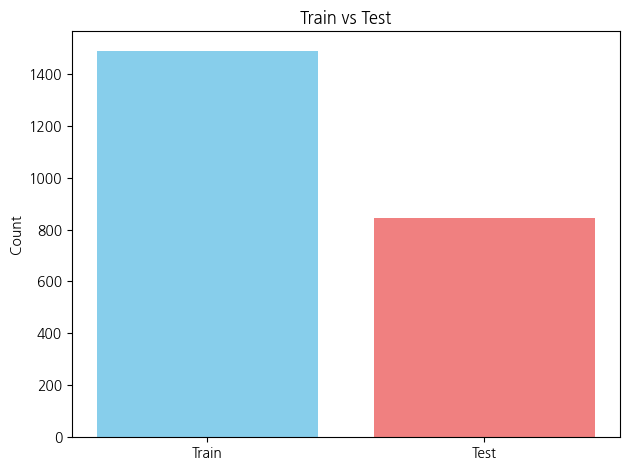

In [25]:
def plot_train_mixing_one(df):
    import matplotlib.pyplot as plt

    counts = {
        'Train': df['Train'].sum(),
        'Test': len(df) - df['Train'].sum(),
        'mixing': df['mixing'].sum(),
        'one': df['one'].sum()
    }

    plt.plot(figsize=(12, 5))

    # Train/Validation 비율
    plt.bar(['Train', 'Test'], [counts['Train'], counts['Test']], color=['skyblue', 'lightcoral'])
    plt.title('Train vs Test')
    plt.ylabel('Count')

    # # mixing/one 비율
    # ax[1].bar(['mixing', 'one'], [counts['mixing'], counts['one']], color=['lightgreen', 'orange'])
    # ax[1].set_title('mixing vs one')
    # ax[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()
plot_train_mixing_one(df)

In [18]:
df_org = df.copy()

In [19]:
df = df_org.copy()

In [20]:
df.describe().head_att(10)

                                                filename                                                                                                                                                                         jsonpath                                                                                                                        pngpath json_exists png_exists pair_exists json_name_match png_name_match Train mixing   one
  count                                             2332                                                                                                                                                                             1489                                                                                                                           2332        2332       2332        2332            2332           2332  2332   2332  2332
 unique                                             2332                                                    

In [21]:
df[df['Train'] == False].head_att(3)

   filename jsonpath                                                                          pngpath json_exists png_exists pair_exists json_name_match png_name_match Train mixing   one
 0        1      nan   d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\1.png       False       True       False           False           True False  False False
 1       10      nan  d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\10.png       False       True       False           False           True False  False False
 2      100      nan d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\100.png       False       True       False           False           True False  False False


In [31]:
# json 파일을 DataFrame로 로드
import math

df = df_org.copy()
def json_to_df(json_path):
    """
    json_path의 json 파일을 pandas DataFrame으로 변환
    - images, annotations, categories를 각각 DataFrame으로 반환
    """
    with open(json_path, encoding='utf-8') as f:
        data = json.load(f)

    df_images = pd.DataFrame(data.get('images', []))
    df_annotations = pd.DataFrame(data.get('annotations', []))
    df_categories = pd.DataFrame(data.get('categories', []))

    return df_images, df_annotations, df_categories

def bbox_to_yolo(bbox, img_width, img_height):
    # bbox: [x, y, w, h] (COCO)
    if not bbox or len(bbox) < 4:
        return None  # 오류시 None 반환

    x, y, w, h = bbox[:4]
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    w_norm = w / img_width
    h_norm = h / img_height
    return x_center, y_center, w_norm, h_norm

def collect_json_info(df, empty_json_is_test=True):
    """
    df['jsonpath']를 순회하며 json_to_df로 정보를 읽고,
    df에 drug_N, width, height, bbox_x/y/w/h, yolo_x/y/w/h 컬럼을 추가.
    약 정보는 drug_N 기준으로 중복 없이 df_drug에 저장.
    bbox 오류가 있는 파일은 출력하고 제거.
    """
    import pandas as pd

    records = []
    drug_info = {}
    error_files = []  # 오류 파일 목록

    pbar = tqdm(df.iterrows(), total=len(df), mininterval=3, desc="Processing JSON files")
    for idx, row in pbar:
        png_path = row['pngpath']
        json_path = row['jsonpath']
        filename = row['filename']
        #if json_path is None or os.path.exists(json_path) is False:
        
        if empty_json_is_test:
            if row['Train'] == False:
                # print(f"Train=False 건너뜀 - 파일: {filename}, 경로: {png_path}", os.path.exists(png_path))
                if os.path.exists(png_path) :
                    # print(f"Train=False 추가 - 파일: {filename}, 경로: {png_path}", os.path.exists(png_path))
                    # pbar.set_postfix_str(f"Test 추가 {filename}")
                    records.append({
                        **row,
                        'Test' : True,
                        'drug_N': None,
                        'width': 0,
                        'height': 0,
                        'bbox_x': 0,
                        'bbox_y': 0,
                        'bbox_w': 0,
                        'bbox_h': 0,
                        'yolo_x': 0.0,
                        'yolo_y': 0.0,
                        'yolo_w': 0.0,
                        'yolo_h': 0.0
                    })
                    continue
                # pbar.set_postfix_str(f"Test 없음 {filename}")
                continue        
        
        if json_path is None or (isinstance(json_path, float) and math.isnan(json_path)) or os.path.exists(json_path) is False:
            #print(f"파일 없음 - 파일: {filename}, 경로: {json_path}")
            pbar.set_postfix_str(f"파일 없음 - 파일: {filename}, 경로: {json_path}")
            continue

        try:
            df_images, df_annotations, df_categories = json_to_df(json_path)
        except Exception as e:
            print(f"JSON 파싱 오류 - 파일: {filename}, 오류: {e}")
            error_files.append(filename)
            continue

        if df_images.empty or df_annotations.empty:
            print(f"데이터 부족 - 파일: {filename} (images: {len(df_images)}, annotations: {len(df_annotations)})")
            error_files.append(filename)
            continue

        img_row = df_images.iloc[0]
        ann_row = df_annotations.iloc[0]
        cat_row = df_categories.iloc[0] if not df_categories.empty else {}

        # bbox 검증
        bbox = ann_row.get('bbox', [])
        if not bbox or len(bbox) < 4:
            print(f"bbox 오류 - 파일: {filename}, bbox: {bbox}")
            error_files.append(filename)
            continue

        # YOLO bbox 계산
        yolo_result = bbox_to_yolo(bbox, img_row['width'], img_row['height'])
        if yolo_result is None:
            print(f"YOLO 변환 오류 - 파일: {filename}")
            error_files.append(filename)
            continue

        x_center, y_center, w_norm, h_norm = yolo_result

        # 기존 df row에 정보 추가
        records.append({
            **row,
            'Test' : False,
            'drug_N': img_row.get('drug_N'),
            'width': img_row.get('width'),
            'height': img_row.get('height'),
            'bbox_x': bbox[0],
            'bbox_y': bbox[1],
            'bbox_w': bbox[2],
            'bbox_h': bbox[3],
            'yolo_x': x_center,
            'yolo_y': y_center,
            'yolo_w': w_norm,
            'yolo_h': h_norm
        })

        # 약 정보 dict (중복 제거)
        drug_N = img_row.get('drug_N')
        if drug_N and drug_N not in drug_info:
            drug_info[drug_N] = {
                'drug_N': drug_N,
                'drug_S': img_row.get('drug_S'),
                'dl_name': img_row.get('dl_name'),
                'dl_name_en': img_row.get('dl_name_en'),
                'img_key': img_row.get('img_key'),
                'dl_material': img_row.get('dl_material'),
                'dl_material_en': img_row.get('dl_material_en'),
                'dl_custom_shape': img_row.get('dl_custom_shape'),
                'dl_company': img_row.get('dl_company'),
                'dl_company_en': img_row.get('dl_company_en'),
                'di_class_no': img_row.get('di_class_no'),
                'di_etc_otc_code': img_row.get('di_etc_otc_code'),
                'di_edi_code': img_row.get('di_edi_code'),
                'chart': img_row.get('chart'),
                'drug_shape': img_row.get('drug_shape'),
                'form_code_name': img_row.get('form_code_name'),
                'supercategory': cat_row.get('supercategory', ''),
                'name': cat_row.get('name', '')
            }
        if idx % 100 == 0:
            pbar.set_postfix_str(filename)

    print(f"\n=== 처리 결과 ===")
    print(f"전체 파일: {len(df)}")
    print(f"성공 처리: {len(records)}")
    print(f"오류 파일: {len(error_files)}")
    if error_files:
        print(f"오류 파일 목록 (처음 10개): {error_files[:10]}")

    df_new = pd.DataFrame(records)
    df_drug = pd.DataFrame(list(drug_info.values()))
    
    train_df = df_new[df_new['Train'] == True]
    drug_classes = {drug_N: idx+1 for idx, drug_N in enumerate(sorted(train_df['drug_N'].unique()))}
    
    df_new['class_id'] = train_df['drug_N'].map(drug_classes).fillna(0).astype(int)
    df_drug['class_id'] = df_drug['drug_N'].map(drug_classes).fillna(0).astype(int)

    # df_drug = pd.DataFrame(list(drug_info.values()))
    # drug_classes = {drug_N: idx+1 for idx, drug_N in enumerate(sorted(df_new['drug_N'].unique()))}
    # df_new['class_id'] = df_new['drug_N'].map(drug_classes).fillna(0).astype(int)
    # df_drug['class_id'] = df_drug['drug_N'].map(drug_classes).fillna(0).astype(int)
    
    return df_new, df_drug, drug_classes

def create_yolo_dataset(df_org, ignore=True):
    df = helper.pd_checkout("df_codeit04_new", commit_dir=drive_root())
    df_drug = helper.pd_checkout("df_codeit04_drug", commit_dir=drive_root())
    if df.empty or df_drug.empty or ignore:
        from datetime import datetime
        print("JSON 정보 수집 중...")
        # 실행
        df, df_drug, _ = collect_json_info(df_org)
        print('df_new shape:', df.shape)
        print('df_drug shape:', df_drug.shape)

        helper.pd_commit(df, "df_codeit04_new", commit_dir=drive_root())
        helper.pd_commit(df_drug, "df_codeit04_drug", commit_dir=drive_root())

        print("df_codeit04_new, df_codeit04_drug 저장")
    else:
        print("이미 df_codeit04_new, df_codeit04_drug가 존재함")
    
    return df, df_drug

df_train_val_test, df_drug = create_yolo_dataset(df_org = df_org, ignore=True)
print('-' * 80)
df_train_val_test.head_att(2)
df_train_val_test.describe().head_att(10)
print('-' * 80)
df_drug.head_att(2)
df_drug.describe().head_att(10)

drug_classes = dict(zip(df_drug['drug_N'], df_drug['class_id']))
drug_classes_idx = dict(zip(df_drug['class_id'], df_drug['drug_N']))

print('-' * 80)
print("Train 개수:", df_train_val_test['Train'].sum())
print("Test 개수:", len(df_train_val_test) - df_train_val_test['Train'].sum())



JSON 정보 수집 중...


Processing JSON files:   0%|          | 0/2332 [00:00<?, ?it/s]

Processing JSON files: 100%|██████████| 2332/2332 [00:02<00:00, 892.15it/s, K-003544-004543-016551-033878_0_2_0_2_90_000_200]


=== 처리 결과 ===
전체 파일: 2332
성공 처리: 2332
오류 파일: 0
df_new shape: (2332, 24)
df_drug shape: (73, 19)
✅ 커밋 완료: 85316f65d14b | 2025-09-10 23:53:36 | df_codeit04_new
✅ 커밋 완료: 79044a717e0a | 2025-09-10 23:53:36 | df_codeit04_drug
df_codeit04_new, df_codeit04_drug 저장
--------------------------------------------------------------------------------
   filename jsonpath                                                                         pngpath json_exists png_exists pair_exists json_name_match png_name_match Train mixing   one Test drug_N width height bbox_x bbox_y bbox_w bbox_h yolo_x yolo_y yolo_w yolo_h class_id
 0        1      nan  d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\1.png       False       True       False           False           True False  False False True   None     0      0      0      0      0      0      0      0      0      0      nan
 1       10      nan d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\10.png       F

In [44]:
# df를 class_id의 개수 별로 정렬하고 
# 1. class 별로 랜덤하게 1개씩 Test False 하고
# 2. 1 개수를 포함하여 랜덤하게 3%
# 3. Train의 drug_N 유니크 갯수 확인
# Train = True면 시험
# Train = Fasle이고 Test Fasle 이면 Validation 
# Test = True 이면 Test 로 하자

df = df_train_val_test.copy()

# 1. class_id별로 정렬
df_sorted = df.sort_values('class_id')

# 2. 각 class별로 랜덤하게 1개씩 (Validation)
for class_id in df['class_id'].unique():
    idxs = df[(df['class_id'] == class_id) & (df['Train'] == True)].index
    if len(idxs) > 0:
        chosen = np.random.choice(idxs, 1, replace=False)
        df.loc[chosen, 'Train'] = False  # Validation으로 변경

# 3. 각 class별로 전체 샘플의 3%를 랜덤하게 Validation으로 설정 (Test=False)
for class_id in df['class_id'].unique():
    idxs = df[(df['class_id'] == class_id) & (df['Train'] == True)].index
    if len(idxs) >= 3:  # 샘플이 3개 이상인 class만
        n_val = max(1, int(len(idxs) * 0.03))
        if n_val > 0:
            chosen = np.random.choice(idxs, n_val, replace=False)
            df.loc[chosen, 'Train'] = False  # Validation으로 변경

# 4. Train의 drug_N 유니크 갯수 확인
print("전체 drug_N 유니크 갯수:", df[df['Test'] == False]['drug_N'].nunique())
print("Train의 drug_N 유니크 갯수:", df[df['Train'] == True]['drug_N'].nunique())
print("Validation의 drug_N 유니크 갯수:", df[(df['Train'] == False) & (df['Test'] == False)]['drug_N'].nunique())

# 5. 데이터셋 분류 기준 컬럼 추가
df['set_type'] = np.where(df['Train'] == True, 'Train',
                  np.where((df['Train'] == False) & (df['Test'] == False), 'Validation',
                  np.where(df['Test'] == True, 'Test', 'Unknown')))

print('-' * 80)
print("최종 데이터셋 분포:")
print("전체:", len(df), 
      "Train:", df['Train'].sum(),
      "Validation:", (len(df) - df['Test'].sum()) - df['Train'].sum(), 
      "Test:", df['Test'].sum())



전체 drug_N 유니크 갯수: 73
Train의 drug_N 유니크 갯수: 73
Validation의 drug_N 유니크 갯수: 73
--------------------------------------------------------------------------------
최종 데이터셋 분포:
전체: 2332 Train: 1339 Validation: 150 Test: 843


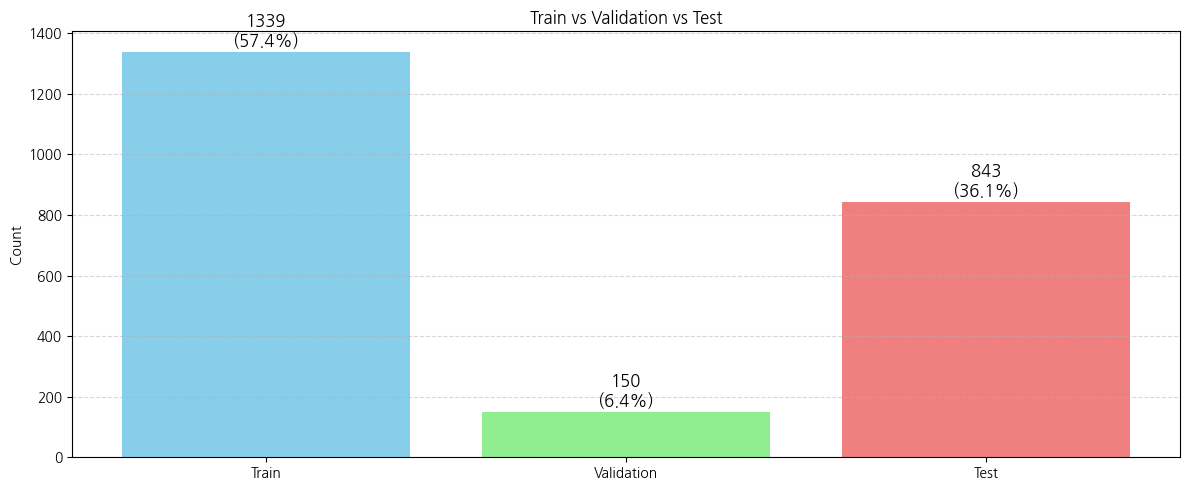

In [45]:
def plot_train_mixing_one(df):
    import matplotlib.pyplot as plt

    counts = {
        'Train': df['Train'].sum(),
        'Validation': (len(df) - df['Test'].sum()) - df['Train'].sum(),
        'Test': df['Test'].sum(),
        'mixing': df['mixing'].sum(),
        'one': df['one'].sum()
    }

    total = counts['Train'] + counts['Validation'] + counts['Test']
    labels = ['Train', 'Validation', 'Test']
    values = [counts['Train'], counts['Validation'], counts['Test']]
    colors = ['skyblue', 'lightgreen', 'lightcoral']

    plt.figure(figsize=(12, 5))
    bars = plt.bar(labels, values, color=colors)

    # 막대 위에 개수 및 % 표시
    for bar, value in zip(bars, values):
        percent = value / total * 100 if total > 0 else 0
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                 f'{value}\n({percent:.1f}%)',
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.title('Train vs Validation vs Test')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_train_mixing_one(df)

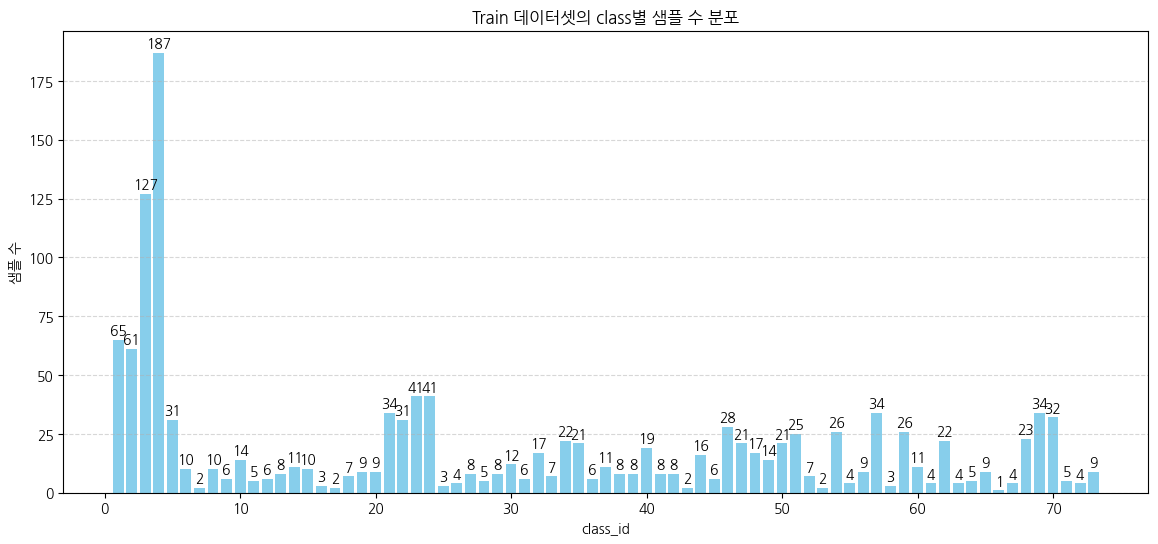

In [46]:
def plot_train_class_distribution(df):
    import matplotlib.pyplot as plt

    # Train만 필터링
    df_train = df[df['set_type'] == 'Train']
    class_counts = df_train['class_id'].value_counts().sort_index()

    plt.figure(figsize=(14, 6))
    bars = plt.bar(class_counts.index, class_counts.values, color='skyblue')

    # 각 막대 위에 개수 표시
    for bar, value in zip(bars, class_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{value}', ha='center', va='bottom', fontsize=10)

    plt.title('Train 데이터셋의 class별 샘플 수 분포')
    plt.xlabel('class_id')
    plt.ylabel('샘플 수')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
plot_train_class_distribution(df)    

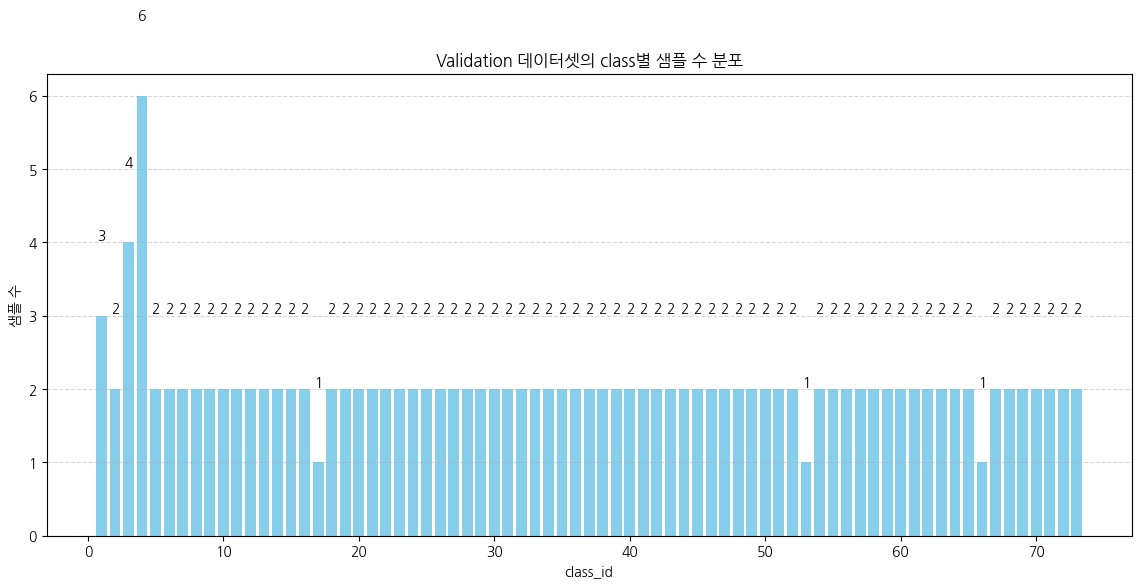

In [47]:
def plot_validation_class_distribution(df):
    import matplotlib.pyplot as plt

    # Validation만 필터링
    df_val = df[df['set_type'] == 'Validation']
    class_counts = df_val['class_id'].value_counts().sort_index()

    plt.figure(figsize=(14, 6))
    bars = plt.bar(class_counts.index, class_counts.values, color='skyblue')

    # 각 막대 위에 개수 표시
    for bar, value in zip(bars, class_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{value}', ha='center', va='bottom', fontsize=10)

    plt.title('Validation 데이터셋의 class별 샘플 수 분포')
    plt.xlabel('class_id')
    plt.ylabel('샘플 수')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plot_validation_class_distribution(df)    

In [48]:
print(df.shape, df_drug.shape)
print("drug_N 유니크 갯수:", df['drug_N'].nunique())
print()
df.head_att(10)
print()
df.describe().head_att(10)
print('-' * 80)
print("df_drug 갯수:", len(df_drug))
print()
df_drug.head_att(10)
print()
df_drug.describe().head_att(10)

(2332, 25) (73, 19)
drug_N 유니크 갯수: 73

   filename jsonpath                                                                           pngpath json_exists png_exists pair_exists json_name_match png_name_match Train mixing   one Test drug_N width height bbox_x bbox_y bbox_w bbox_h yolo_x yolo_y yolo_w yolo_h class_id set_type
 0        1      nan    d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\1.png       False       True       False           False           True False  False False True   None     0      0      0      0      0      0      0      0      0      0      nan     Test
 1       10      nan   d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\10.png       False       True       False           False           True False  False False True   None     0      0      0      0      0      0      0      0      0      0      nan     Test
 2      100      nan  d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\100.p

drug_N별 샘플 갯수 상위 10개:
인덱스    count  
index     count  
K-003483  193    
K-003351  131    
K-001900  68     
K-002483  63     
K-016548  43     
drug_N
K-003832    4
K-023203    4
K-012420    3
K-027993    3
K-033878    2
Name: count, dtype: int64


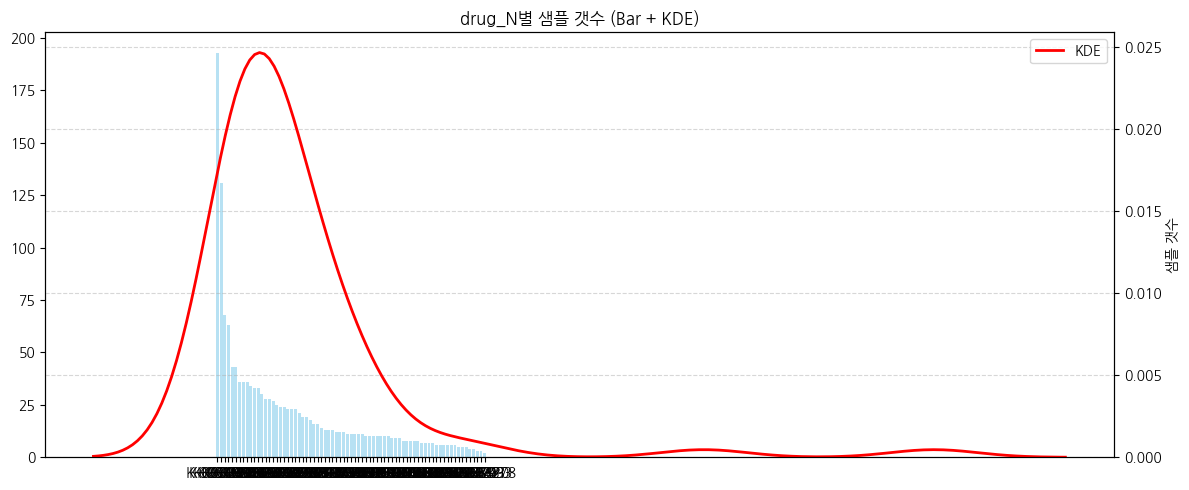

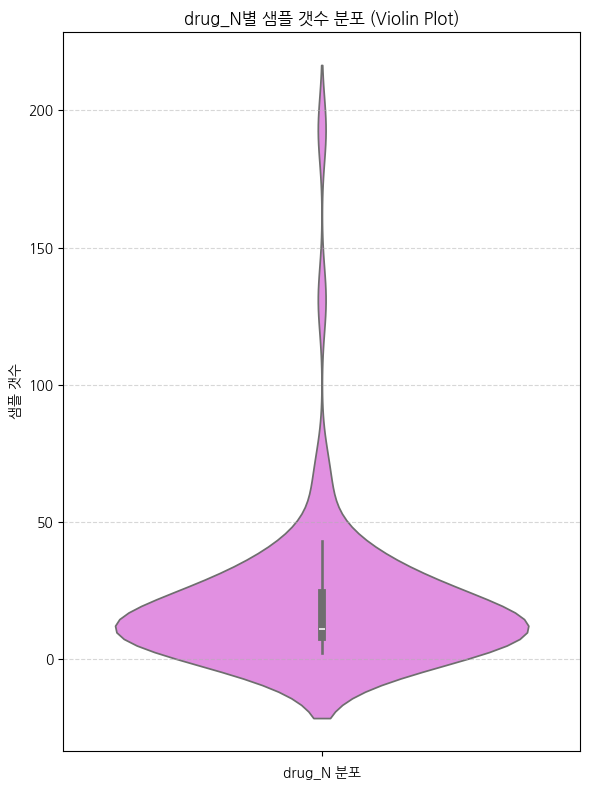

In [49]:
# drug_N별 데이터 분포도(샘플 갯수) 살펴보기
def plot_dfrug_distribution(df):
    # drug_N별 샘플 갯수 집계
    drug_counts = df['drug_N'].value_counts().sort_values(ascending=False)

    print("drug_N별 샘플 갯수 상위 10개:")
    drug_counts.head_att(5)
    print(drug_counts.tail(5))

    plt.figure(figsize=(12,5))
    # 막대그래프
    plt.bar(drug_counts.index, drug_counts.values, width=0.8, color='skyblue', alpha=0.6, label='Bar')
    # KDE 곡선 (x축은 drug_N별 샘플 갯수)
    ax2 = plt.gca().twinx()
    sns.kdeplot(drug_counts.values, color='red', linewidth=2, ax=ax2, label='KDE')
    ax2.set_ylabel('밀도')
    ax2.grid(axis='y', linestyle='--', alpha=0.5)  # 가로 그리드 라인 추가
    plt.title('drug_N별 샘플 갯수 (Bar + KDE)')
    plt.xlabel('drug_N')
    plt.ylabel('샘플 갯수')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

plot_dfrug_distribution(df)

def plot_dfrug_distribution_violin(df):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # drug_N별 샘플 갯수 집계
    drug_counts = df['drug_N'].value_counts()

    plt.figure(figsize=(6,8))
    ax = sns.violinplot(y=drug_counts.values, color='violet')
    ax.set_title('drug_N별 샘플 갯수 분포 (Violin Plot)')
    ax.set_ylabel('샘플 갯수')
    ax.set_xlabel('drug_N 분포')
    ax.grid(axis='y', linestyle='--', alpha=0.5)  # 가로 그리드 라인 추가
    plt.tight_layout()
    plt.show()

plot_dfrug_distribution_violin(df)


In [51]:
# raise ValueError("STOP here for setup")
df.head_att(2)

   filename jsonpath                                                                         pngpath json_exists png_exists pair_exists json_name_match png_name_match Train mixing   one Test drug_N width height bbox_x bbox_y bbox_w bbox_h yolo_x yolo_y yolo_w yolo_h class_id set_type
 0        1      nan  d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\1.png       False       True       False           False           True False  False False True   None     0      0      0      0      0      0      0      0      0      0      nan     Test
 1       10      nan d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\10.png       False       True       False           False           True False  False False True   None     0      0      0      0      0      0      0      0      0      0      nan     Test


# 여기서부터 작업할것
- yolo df를 만든다.
- yolo file cp는 따로 한다.

In [52]:
def create_yolo_dataset(df, yolo_dataset_path):
    """
    df head 이다.
   filename jsonpath                                                                         pngpath json_exists png_exists pair_exists json_name_match png_name_match Train mixing   one Test drug_N width height bbox_x bbox_y bbox_w bbox_h yolo_x yolo_y yolo_w yolo_h class_id set_type
 0        1      nan  d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\1.png       False       True       False           False           True False  False False True   None     0      0      0      0      0      0      0      0      0      0      nan     Test
 1       10      nan d:\dataset\kaggle_code_it_data\ai04-level1-project.zip.unzip\test_images\10.png       False       True       False           False           True False  False False True   None     0      0      0      0      0      0      0      0      0      0      nan     Test
 
dataset/
├── images/
│   ├── train/
│   │   ├── image1.jpg
│   │   ├── image2.jpg
│   │   └── ...
│   ├── val/
│   │   ├── val_image1.jpg
│   │   └── ...
│   └── test/ (선택적)
└── labels/
    ├── train/
    │   ├── image1.txt
    │   ├── image2.txt
    │   └── ...
    ├── val/
    │   ├── val_image1.txt
    │   └── ...
    └── test/ (선택적)

    DataFrame df_convert_yolo를 만들고 df를 복사하고 to yolo_image_train, yolo_image_val, yolo_label_train, yolo_label_val를 만든다.
    df의 Train 컬럼을 참고 하면 된다.
    df_convert_yolo를 yolo_dataset_path에 저장한다. (원복등에 참고 할 수 있을 것이다.)

    만들어진 df_convert_yolo 를 이용하여 images를 yolo_image_train, yolo_image_val에 이동시킨다.
    전체적인 데이타 용량이 큼으로 파일을 이동시키는 방식으로 한다.

    """

    images_train_dir = os.path.join(yolo_dataset_path, 'images', 'train')
    images_val_dir = os.path.join(yolo_dataset_path, 'images', 'val')
    images_test_dir = os.path.join(yolo_dataset_path, 'images', 'test')
    labels_train_dir = os.path.join(yolo_dataset_path, 'labels', 'train')
    labels_val_dir = os.path.join(yolo_dataset_path, 'labels', 'val')
    labels_test_dir = os.path.join(yolo_dataset_path, 'labels', 'test')
    for d in [images_train_dir, images_val_dir, images_test_dir, labels_train_dir, labels_val_dir, labels_test_dir]:
        os.makedirs(d, exist_ok=True)

    pbar = tqdm(df.iterrows(), total=len(df), mininterval=3, desc="Creating YOLO dataset")
    for idx, row in pbar:
        set_type = row.get('set_type', 'Unknown')
        img_dst, label_dst = None, None

        if set_type == 'Train':
            img_dst = os.path.join(images_train_dir, os.path.basename(row['pngpath']))
            label_dst = os.path.join(labels_train_dir, os.path.splitext(os.path.basename(row['pngpath']))[0] + '.txt')
        elif set_type == 'Validation':
            img_dst = os.path.join(images_val_dir, os.path.basename(row['pngpath']))
            label_dst = os.path.join(labels_val_dir, os.path.splitext(os.path.basename(row['pngpath']))[0] + '.txt')
        elif set_type == 'Test':
            img_dst = os.path.join(images_test_dir, os.path.basename(row['pngpath']))
            label_dst = os.path.join(labels_test_dir, os.path.splitext(os.path.basename(row['pngpath']))[0] + '.txt')
        else:
            continue

        df.loc[idx, 'yolo_image'] = img_dst
        df.loc[idx, 'yolo_label'] = label_dst

        # # 이미지 파일 이동 (이미 있으면 건너뜀)
        # if not os.path.exists(img_dst):
        #     try:
        #         if os.path.exists(row['pngpath']):
        #             shutil.copy(row['pngpath'], img_dst)
        #     except Exception as e:
        #         print(f"이미지 이동 오류: {row['pngpath']} -> {img_dst}, {e}")

        # # 라벨 파일 생성 (Train/Val은 반드시 필요, Test는 없어도 됨)
        # if set_type in ['Train', 'Validation']:
        #     try:
        #         with open(label_dst, 'w', encoding='utf-8') as f:
        #             f.write(f"{row['class_id']} {row['yolo_x']} {row['yolo_y']} {row['yolo_w']} {row['yolo_h']}\n")
        #     except Exception as e:
        #         print(f"[경고] 라벨 저장 오류: {label_dst}, {e}")
        # elif set_type == 'Test':
        #     # Test는 라벨 없어도 무시
        #     pass

        if idx % 100 == 0:
            pbar.set_postfix_str(os.path.basename(row['pngpath']))

    return df

yolo_path  = os.path.join(root_dir, "yolo")
df_yolo = helper.pd_checkout("df_codeit04_yolo", commit_dir=drive_root())
if df_yolo.empty:
    df_yolo = create_yolo_dataset(df, yolo_path)
    helper.pd_commit(df_yolo, "df_codeit04_yolo", commit_dir=drive_root())
else:
    print("df_yolo 로드됨")


df_yolo 로드됨


In [ ]:
print(df_yolo.shape)
df_yolo.head_att(2)
df_yolo.describe().head_att(10)

In [ ]:
import shutil

def create_yolo_file(df_yolo, yolo_dataset_path, ignore=False):
    """
    DataFrame에서 YOLO 포맷 파일을 생성합니다.

        매개변수:
            df_yolo (pd.DataFrame): YOLO 데이터셋 정보를 담고 있는 DataFrame.
            yolo_dataset_path (str): YOLO 데이터셋 디렉토리 경로.
            ignore (bool, 선택): 기존 파일을 무시할지 여부. 기본값은 False.

    """
    pbar = tqdm(df_yolo.iterrows(), total=len(df_yolo), mininterval=3, desc="Move YOLO Files")
    for idx, row in pbar:
        src_img_path = row['pngpath']
        src_json_path = row['jsonpath']
        dest_img_path = None
        dest_label_path = None
        if row['Train']:
            dest_img_path = row['yolo_image']
            dest_label_path = row['yolo_label']
        else:
            dest_img_path = row['yolo_image']
            dest_label_path = row['yolo_label']

        #print(f"이미지: {src_img_path} -> {dest_img_path}")
        #print(f"라벨: {src_json_path} -> {dest_label_path}")
        str_end = os.path.basename(dest_img_path)

        # # 이미지 파일 이동 (이미 있으면 건너뜀)
        if ignore or not os.path.exists(dest_img_path):
            try:
                if os.path.exists(src_img_path):
                    shutil.move(row['pngpath'], dest_img_path)
            except Exception as e:
                print(f"이미지 이동 오류: {row['pngpath']} -> {dest_img_path}, {e}")
        else:
            str_end += " (이미존재)"

        # YOLO 라벨 파일 생성 (class x_center y_center w h)
        try:
            if ignore or not os.path.exists(dest_label_path):
                with open(dest_label_path, 'w', encoding='utf-8') as f:
                    f.write(f"{row['class_id']} {row['yolo_x']} {row['yolo_y']} {row['yolo_w']} {row['yolo_h']}\n")
        except Exception as e:
            print(f"라벨 저장 오류: {dest_label_path}, {e}")

        if idx % 100 == 0:
            pbar.set_postfix_str(str_end)

    df_drug_sort = df_drug.sort_values(by='class_id')
    classids = df_drug_sort['class_id'].tolist()
    classnames = df_drug_sort['drug_N'].tolist()
    dl_name = df_drug_sort['dl_name'].tolist()

    # dataset.yaml 파일 생성
    dataset_config = {
        'path': yolo_dataset_path,
        'train': 'images/train',
        'val': 'images/val',
        'test': 'images/test',
        'nc': len(classnames),
        'names': classnames
    }

    yaml_path = os.path.join(yolo_dataset_path, "dataset.yaml")
    with open(yaml_path, 'w') as f:
        yaml.dump(dataset_config, f, default_flow_style=False)
    return yaml_path

yaml_path = create_yolo_file(df_yolo, yolo_path)